In [84]:
#Q1 setup - Asher Wright
import numpy as np
import matplotlib.pyplot as plt

def calculate_MSE(xs, ys, params):
    err = 0
    for i in range(0, len(xs)):
        exp_y = 0
        for j in range(0, len(params)):
            exp_y += params[j]*(xs[i]**j)
        err += (exp_y - ys[i])**2
    return err / len(xs)

train = np.genfromtxt(open("Datasets/Dataset_1_train.csv", "rb"), delimiter=",")
validate = np.genfromtxt(open("Datasets/Dataset_1_valid.csv", "rb"), delimiter=",") 
test = np.genfromtxt(open("Datasets/Dataset_1_test.csv", "rb"), delimiter = ",")

train_xs = train[:, 0]
train_ys = train[:, 1]
validate_xs = validate[:, 0] 
validate_ys = validate[:, 1]
test_xs = test[:, 0]
test_ys = test[:, 1]

train_length = len(train_xs)
DEGREE = 20

[  1.63589790e+00  -7.38271283e+01  -4.25281717e+01   5.31825353e+03
  -5.20858119e+03  -1.07444936e+05   1.17479087e+05   9.53789773e+05
  -1.05531054e+06  -4.52500724e+06   4.98268641e+06   1.25196291e+07
  -1.35800639e+07  -2.08213558e+07   2.20669219e+07   2.04831402e+07
  -2.10786012e+07  -1.09752648e+07   1.09159390e+07   2.46742574e+06
  -2.36370622e+06]


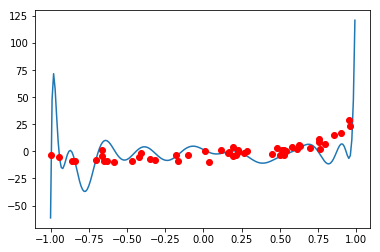

Training MSE = 100.171027568
Validation MSE = 656.009173835


In [85]:
#Q1a - Asher Wright
X = np.zeros((train_length, DEGREE+1))

for exponent in range(0, DEGREE+1):
      for i in range(0, train_length):
            X[i][exponent] = train_xs[i] ** exponent

XT = X.transpose()

XTX = np.matmul(XT, X)
XTXI = np.linalg.inv(XTX)
XTXIXT = np.matmul(XTXI, XT)

b = np.matmul(XTXIXT, test_ys)

polynomial = np.poly1d(b[::-1])
print(b)
x_poly = np.arange(-1,1,0.01)
y_poly = polynomial(x_poly)

plt.plot(x_poly, y_poly)
plt.plot(train_xs, train_ys, 'ro')
plt.show()
print("Training MSE = " + str(calculate_MSE(train_xs, train_ys, b)))
print("Validation MSE = " + str(calculate_MSE(validate_xs, validate_ys, b)))

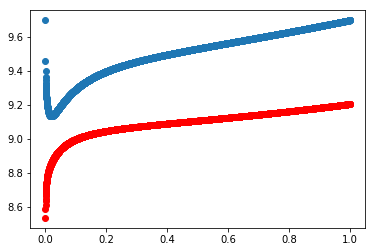

The best value for lambda is 0.0196, where the error is 9.69918044261


In [95]:
#Q1b - Asher Wright
#Step 1: Solve least square eq on train set
#Step 2: Use validation set to find best lambda
X = np.zeros((train_length, DEGREE+1))
identity_matrix = np.zeros((DEGREE+1, DEGREE+1))

for exponent in range(0, DEGREE+1):
    for i in range(0, train_length):
        X[i][exponent] = all_xs[i] ** exponent
    identity_matrix[exponent][exponent] = 1;
    
XT = X.transpose()

XTX = np.matmul(XT, X)

lambda_count = 5000
upper_bound = 1
lambdas = np.zeros(lambda_count)
train_MSEs = np.zeros(lambda_count)
validate_MSEs = np.zeros(lambda_count)

min_validate_MSE = float("inf")
lambda_at_min = 0

#Go through lambdas and find best one.
for l_index in range(0, lambda_count):
    lam = l_index/(lambda_count * 1.) * (upper_bound)
    lambdas[l_index] = lam
    lambdaI = lam * identity_matrix
    #G is equal to X transpose * X plus Lambda * I
    G = np.add(XTX, lambdaI)
    Ginv = np.linalg.inv(G)
    GinvXT = np.matmul(Ginv, XT)
    b = np.matmul(GinvXT, train_ys)
    
    #calculate the MSE and add it to our array
    train_MSEs[l_index] = calculate_MSE(train_xs, train_ys, b)
    validate_MSEs[l_index] = calculate_MSE(validate_xs, validate_ys, b)
    if(validate_MSEs[l_index] < min_validate_MSE):
       min_validate_MSE = validate_MSEs[l_index]
       lambda_at_min = lam


# Now graph the relationship between lambda and MSE
plt.plot(lambdas[1:], train_MSEs[1:], "ro")
plt.plot(lambdas[1:], validate_MSEs[1:], "o")
plt.show()
print("The best value for lambda is " + str(lambda_at_min) + ", where the error is " + str(validate_MSEs[l_index]))

The MSE of the test set is 10.7330023809


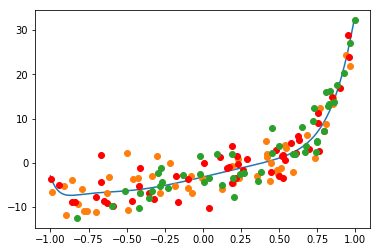

In [131]:
#Q1b continued - Asher Wright
#Step 3: See how it looks on the test set
#(separate block so that the value of lambda can be cached)

#recalculate the b values for the correct lambda
lambdaI = lambda_at_min * identity_matrix
#G is equal to X transpose * X plus Lambda * I
G = np.add(XTX, lambdaI)
Ginv = np.linalg.inv(G)
GinvXT = np.matmul(Ginv, XT)
b = np.matmul(GinvXT, train_ys)

#calculate the test set MSE
test_MSE = calculate_MSE(test_xs, test_ys, b)

print("The MSE of the test set is " + str(test_MSE))

#plot the fit on the test set
#new_b = b[0:21]
#new_polynomial = np.poly1d(new_b[::-1])
#new_x_poly = np.arange(-1,1,0.01)
#new_y_poly = new_polynomial(new_x_poly)
#plt.plot(new_x_poly, new_y_poly)
polynomial = np.poly1d(b[::-1])
x_poly = np.arange(-1,1,0.01)
y_poly = polynomial(x_poly)
plt.plot(x_poly, y_poly)
plt.plot(test_xs, test_ys, 'o')
plt.plot(train_xs, train_ys, 'ro')
plt.plot(validate_xs, validate_ys, 'o')
plt.show()

In [98]:
print(b)

[-3.18980327  8.19659089  0.60130469 -5.5685419   5.82836271  7.1904354
  3.35266913  7.57570568  1.81089018  4.94358647  1.72522583  2.19663508
  1.99716299  0.04130233  1.97205041 -1.41319462  1.46647829 -2.23966538
  0.53128578 -2.56374997 -0.70674843]
